### [D1104_WORK_김현우]
- 데이터 :  titanic_train.csv
- (1) 생존자의 연령(산점도)
- (2) 생존자의 성별(막대)
- (3) 생존자들의 연령과 성별 분석(산점도)
- (4) 등석에 따른 생존자 분석(막대)

[주의]
- 의미없는 그래프 X
- 문제별로 타겟 컬럼/피쳐컬럼 선정
- 스스로 해결하는 힘 키우기!!

## 모듈 로딩 + 원본 데이터 불러오기

In [773]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 원본 데이터

FILE_NAME = '../DATA/titanic_train.csv'

raw_data = pd.read_csv(FILE_NAME)
display(raw_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 사용자 정의 함수

In [774]:
# 연령별 그룹화 함수
def age_group(age):
    if age == 'Unknown':
        return 'Unknown'
    
    # 'Unknown' 처리하고 int 처리
    age = int(age)
    
    if age < 10:
        return '10살 미만 아동 및 유아'
    elif 10 <= age < 20:
        return '10대'
    elif 20 <= age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif age >= 50:
        return '50대 이상'

(1) 생존자의 연령 <hr>
- 필요한 컬럼: Survived, age

1. 데이터 전처리

In [775]:
# 필요한 컬럼만 저장
data1 = raw_data.loc[:,['Survived', 'Age']]

# 결측치 확인 
# - Survived: (0/891)  개 
# - Age     : (177/891)개
print(data1.isnull().sum(axis=0))
# print(len(data1['Survived']))

# 결측치 처리
# - 나이가 결측치인 사람: Unknown
data1['Age'] = data1['Age'].fillna('Unknown')
# print(data1.dtypes)

# 생존자들만 추출
data1 = data1.query('Survived == 1')


# 나이별 사람 수를 저장한 count 열 추가
data1 = data1.groupby('Age').size().reset_index(name='Count')   # size(): 행의 개수
print(data1)

data1['AgeGroup'] = data1['Age'].apply(age_group)
# print(data1)

# # 연령대별 생존자 수 합산
result_data = data1.groupby('AgeGroup')['Count'].sum().reindex(['10살 미만 아동 및 유아', '10대', '20대', '30대', '40대', '50대 이상', 'Unknown'])
display(result_data)

Survived      0
Age         177
dtype: int64
        Age  Count
0      0.42      1
1      0.67      1
2      0.75      2
3      0.83      2
4      0.92      1
..      ...    ...
61     60.0      2
62     62.0      2
63     63.0      2
64     80.0      1
65  Unknown     52

[66 rows x 2 columns]


AgeGroup
10살 미만 아동 및 유아    38
10대               41
20대               77
30대               73
40대               34
50대 이상            27
Unknown           52
Name: Count, dtype: int64

2. 시각화(막대 그래프)

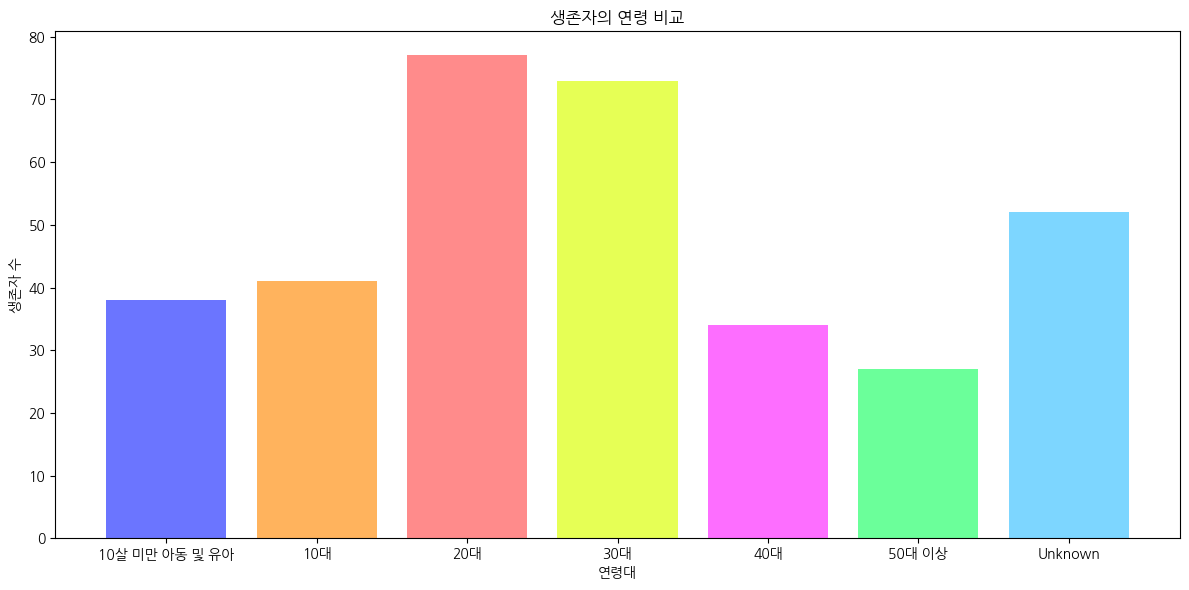

In [776]:
# figure 설정
plt.figure(figsize=(12,6))

xdata = result_data.index
ydata = result_data.values

color = {"#ff8b8b", "#ffb35d", "#e6ff55", "#6bff9a", "#6b75ff", "#fd6eff", "#7dd6ff"}
plt.bar(xdata, ydata, color=color)

plt.title('생존자의 연령 비교')
plt.xlabel('연령대')
plt.ylabel('생존자 수')

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

(2) 생존자의 성별 <hr>
- 필요한 컬럼: Survived, sex

1. 데이터 전처리

In [777]:
# 필요한 컬럼만 저장
data2 = raw_data.loc[:, ['Survived', 'Sex']]
display(data2)

# 결측치 X
print(data2.isnull().sum())

# 생존자 데이터만 추출
data2 = data2.query('Survived==1')
# display(data2)

# 성별 컬럼을 기준으로 생존자 수 구하는 Count열 추가
data2 = data2.groupby('Sex').size().reset_index(name='Count')
data2 = data2.set_index(['Sex'])
display(data2)

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


Survived    0
Sex         0
dtype: int64


,Count
Sex,
female,233
male,109


2. 시각화

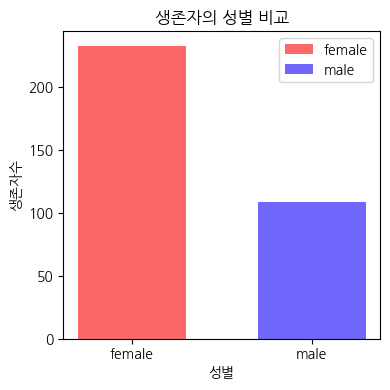

In [778]:
fig = plt.figure(figsize=(4, 4))

color = {"female": "#fc6868", 'male': "#7066fc"}

for sex, col in color.items():
    # 성별에 해당하는 행만 선택
    result_data = data2.loc[[sex]]

    plt.bar(sex, result_data['Count'].values[0], 
            width=0.6, 
            color=col)

plt.title('생존자의 성별 비교')
plt.xlabel('성별')
plt.ylabel('생존자수')

plt.tight_layout()

plt.legend(color.keys())

plt.show()


(3) 생존자들의 연령과 성별 분석 <hr>
- 필요한 컬럼: Survived, Age, Sex

In [779]:
raw_data

data3 = raw_data.loc[:, ['Survived', 'Age', 'Sex']]
print(data3)

data3 = data3.query('Survived==1')
print(data3)

data3 = data3.drop(['Survived'], axis=1)
display(data3)

data3 = data3.groupby('Sex').count()
display(data3)

     Survived   Age     Sex
0           0  22.0    male
1           1  38.0  female
2           1  26.0  female
3           1  35.0  female
4           0  35.0    male
..        ...   ...     ...
886         0  27.0    male
887         1  19.0  female
888         0   NaN  female
889         1  26.0    male
890         0  32.0    male

[891 rows x 3 columns]
     Survived   Age     Sex
1           1  38.0  female
2           1  26.0  female
3           1  35.0  female
8           1  27.0  female
9           1  14.0  female
..        ...   ...     ...
875         1  15.0  female
879         1  56.0  female
880         1  25.0  female
887         1  19.0  female
889         1  26.0    male

[342 rows x 3 columns]


,Age,Sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
...,...,...
875,15.0,female
879,56.0,female
880,25.0,female
887,19.0,female


,Age
Sex,
female,197
male,93


(4) 등석에 따른 생존자 분석 <hr>
- 필요한 컬럼: Survived, Pclass

1. 기본 데이터 확인 및 전처리 방향 설정 

In [780]:
# 원본 데이터 확인
raw_data.head()

# 기본 전처리
data4 = (

    raw_data.loc[:, ['Survived', 'Pclass']]  # 필요한 컬럼만 추출
    .query('Survived == 1')                  # 생존자만 필터링
    .drop('Survived', axis=1)                # 필요없는 열 삭제
)

# 결측치 확인
print(f'결측치 확인 : {data4.isnull().sum()}') # 확인결과 결측치X

# 범주형으로 변환
data4['Pclass'] = data4['Pclass'].astype('category')
# print(data4['Pclass'])

# 등석별 생존자수를 나타내는 컬럼 추가
count_data = data4.groupby('Pclass').size().reset_index(name='Count')
data4 = data4.merge(count_data, on='Pclass')
# display(data4)

# 인덱스 설정
data4.set_index('Pclass', inplace=True)
# display(data4.head())

# 중복 제거
data4 = data4.drop_duplicates()
# display(data4.head())

# Pclass 기준으로 오름차순 정렬
data4 = data4.sort_values(by='Pclass')
display(data4.head())

결측치 확인 : Pclass    0
dtype: int64


C:\Users\khw27\AppData\Local\Temp\ipykernel_27100\3863536640.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data4.groupby('Pclass').size().reset_index(name='Count')


,Count
Pclass,
1,136
2,87
3,119


2. 시각화

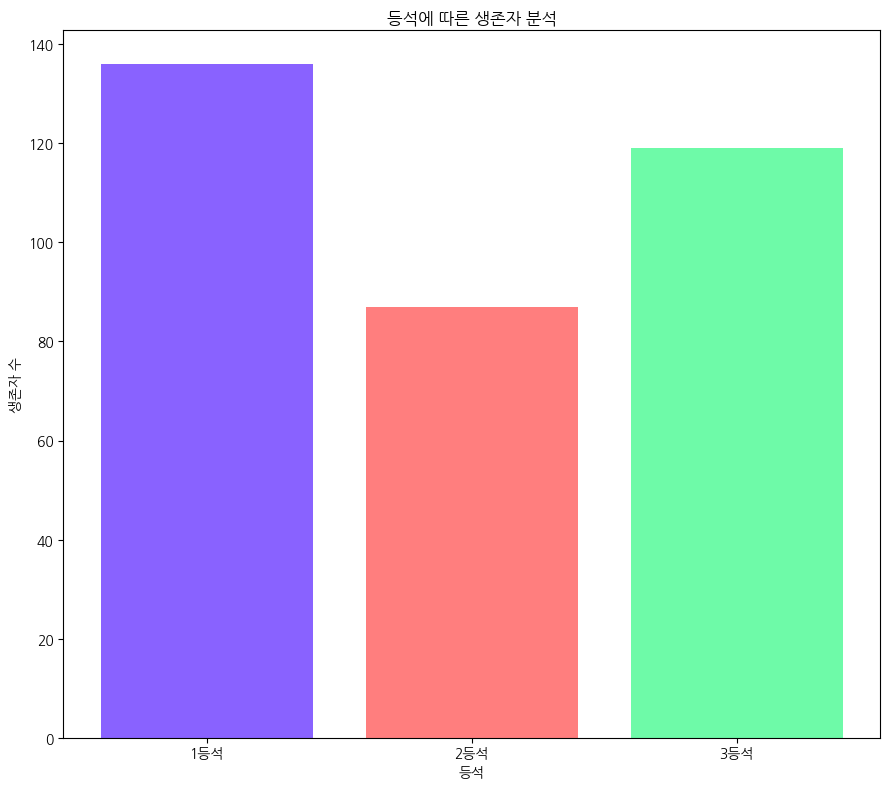

In [781]:
xdata = data4.index.tolist()
ydata = data4['Count'].values.tolist()

plt.figure(figsize=(9, 8))

color = {"#8962ff", "#6efaa8", "#ff7e7e"}

plt.bar(xdata, ydata, color=color)


plt.title('등석에 따른 생존자 분석')
plt.xlabel('등석')
plt.xticks(ticks=xdata, labels=['1등석', '2등석', '3등석'])
plt.ylabel('생존자 수')

plt.tight_layout()
